# HW1

It's highly recommended to write solutions in markdown cells just in this notebook. If you do so, you'll get up to $1$ bonus point depending on how accurate and neat your work is. You can also write the solutions to math problems by hand and then send photos of them, but there will be no bonus in such case. If you are not familiar with LaTeX, see a 2-page [cheat sheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for a quick start.

## Task 1.1 (1 point)

Give an example of two symmetric matrices whose product is not symmetric. 

### YOUR SOLUTION HERE

\begin{bmatrix}
1 & 2 \\
2 & 2 \\
\end{bmatrix}

\begin{bmatrix}
2 & 1 \\
1 & 1 \\
\end{bmatrix}


product of these two symmetric matrices is \begin{bmatrix}
4 & 3 \\
6 & 4 \\
\end{bmatrix} which is not symmetric

## Task 1.2 (2 points)

**Sherman—Morrison formula**. Let $\boldsymbol A \in \mathbb R^{n\times n}$ be an invertible matrix and $\boldsymbol u, \boldsymbol v \in \mathbb R^n$. Prove that

$$
    (\boldsymbol A + \boldsymbol u \boldsymbol v^\top)^{-1} =
    \boldsymbol A^{-1} - \frac{\boldsymbol A^{-1} \boldsymbol u \boldsymbol v^\top \boldsymbol A^{-1}}{1 + \boldsymbol v^\top\boldsymbol A^{-1} \boldsymbol u }.
$$

### YOUR SOLUTION HERE

let $ u = Aw$ and $A + uv^{T} = A (I + wu^{T})$, then $(A + uv^{T})^{-1} = (I + wu^{T})A^{-1} = (I -  \frac {wu^{T}}{1 + v^{T}w}) A ^ {-1}$

Substitute $w = A^{-1}u $

$(A + uv^{T})^{-1} = (I -  \frac {wu^{T}}{1 + v^{T}w}) A ^ {-1} 
= A^{-1} - \frac{ A^{-1}  u  v^\top  A^{-1}}{1 + v^\top A^{-1}  u }.$

## Task 1.3 (1 point)

Simplify the expression

$$
        \det\big(\boldsymbol {AXB} (\boldsymbol C^{-\top} \boldsymbol X^{\top} \boldsymbol C)^\top\big)^{-\top}
$$
    
if $\boldsymbol A,\boldsymbol B, \boldsymbol C, \boldsymbol X \in \mathbb R^{n\times n}$, $\det \boldsymbol C \ne 0$ and $\det (\boldsymbol C^{-\top} \boldsymbol X^{\top} \boldsymbol C) \ne 0$.

### YOUR SOLUTION HERE

Since $\det A^{T} = \det A$ ,
$\det A^{-1} = \frac {1}{\det A}$ and $ \det AB = \det A \cdot \det B $

$ \det (\boldsymbol {AXB} (\boldsymbol C^{-\top} \boldsymbol X^{\top} \boldsymbol C)) = \det (AXBX) = \det(A) \cdot \det(X) \cdot \det(X) \cdot \det(B)$

$\det\big(\boldsymbol {AXB} (\boldsymbol C^{-\top} \boldsymbol X^{\top} \boldsymbol C)^\top\big)^{-\top} = \frac{1}{\det(A) \cdot \det(X) \cdot \det(X) \cdot \det(B)}$ 

## Task 1.4 

Let $\boldsymbol A \in \mathbb R^{n\times n}$ be a symmetric positive definite matrix and

$$
f(\boldsymbol x) = \frac{\boldsymbol x^\top \boldsymbol{Ax}}{\boldsymbol x^\top \boldsymbol x}, \quad \boldsymbol x \in \mathbb R^n.
$$ 

(a) (**2 points**) Calculate $\nabla f(\boldsymbol x)$ and prove that $\nabla f(\boldsymbol x) = \boldsymbol 0$ if $\boldsymbol x$ is an eigenvector of $\boldsymbol A$.

(b) (**1 point**) Prove that 

$$
\max\limits_{\boldsymbol x \ne \boldsymbol 0} f(\boldsymbol x) = \lambda_{\max}(\boldsymbol A), \quad
\min\limits_{\boldsymbol x \ne \boldsymbol 0} f(\boldsymbol x) = \lambda_{\min}(\boldsymbol A)
$$

(c) (**bonus! up to 4 points**) Find $\nabla^2 f(\boldsymbol x)$. Also show that $\nabla^2 f(\boldsymbol x_{\min})$ is (semi)positive definite and  $\nabla^2 f(\boldsymbol x_{\max})$ is (semi)negative definite, where 

$$
    \boldsymbol {Ax}_{\min} = \lambda_{\min} \boldsymbol x_{\min}, \quad \boldsymbol {Ax}_{\max} = \lambda_{\max} \boldsymbol x_{\max}.
$$

### YOUR SOLUTION HERE

## Task 1.5 (programming, 2 points)

Compare the performance of matrix-vector multiplication 

$$
        \boldsymbol {Ax}, \quad \boldsymbol A \in \mathbb R^{n\times n}, \quad \boldsymbol x \in \mathbb R^n,
$$
    
in pure Python and in NumPy. Plot a graph of the execution time versus $n$ (see example below for the inner product of two vectors).

In [5]:
## YOUR CODE HERE

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

%config InlineBackend.figure_format = 'svg'

In [18]:
def python_inner(a, b: np.array):
    res = []
    for x in a:
        res.append(sum(x * b))
    return res

        
def measure_time(func, size, n_samples=1):
    result = np.zeros(n_samples)
    for i in range(n_samples):
        begin = time()
        func(np.random.randn(size), np.random.randn(size))
        result[i] = time() - begin
    return result.mean()
    

def check_correctness(func, max_size, attempts=10):
    for size in range(1, max_size + 1):
        for _ in range(attempts):
            a = np.random.randint(size, size=(size,size))
            b = np.random.randn(size)
            assert np.allclose(func(a, b), np.dot(a, b)), f"different values for {a} and {b}"
    

def get_times_lists(func, step=20, max_size=1000, n_samples=20):
    py_times = []
    np_times = []
    sizes = np.arange(20, max_size + 1, 20)
    for size in sizes:
        py_times.append(measure_time(func, size))
        np_times.append(measure_time(np.dot, size))
    return np.array(py_times), np.array(np_times)

In [19]:
# TESTING AREA

check_correctness(python_inner, 100)

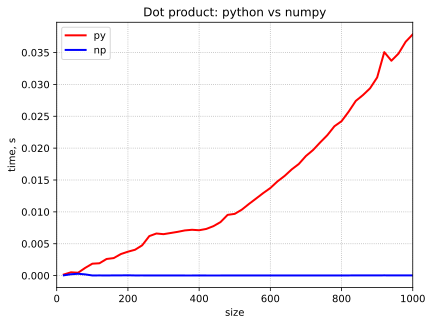

In [20]:
# PLOTTING AREA

def plot_time_vs_size(step=20, max_size=1000, n_samples=20):
    inner_py_times, inner_np_times = get_times_lists(python_inner, step, max_size, n_samples)
    sizes = np.arange(20, max_size + 1, 20)
    plt.plot(sizes, inner_py_times, c='r', lw=2, label="py")
    plt.plot(sizes, inner_np_times, c='b', lw=2, label="np")
    plt.xlim(0, max_size)
    plt.title("Dot product: python vs numpy")
    plt.legend()
    plt.xlabel("size")
    plt.ylabel("time, s")
    plt.grid(ls=":");


plot_time_vs_size()

seems as Numpy works constant while pure Python is growing as dimensions of matrix grow

## Demo for task 1.5: dot product performance

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

%config InlineBackend.figure_format = 'svg'


def python_inner(a, b: np.array):
    return sum(a * b)

        
def measure_time(func, size, n_samples=1):
    result = np.zeros(n_samples)
    for i in range(n_samples):
        begin = time()
        func(np.random.randn(size), np.random.randn(size))
        result[i] = time() - begin
    return result.mean()
    

def check_correctness(func, max_size, attempts=10):
    for size in range(1, max_size + 1):
        for _ in range(attempts):
            a = np.random.randn(size)
            b = np.random.randn(size)
            assert np.allclose(func(a, b), np.dot(a, b)), f"different values for {a} and {b}"
    

def get_times_lists(func, step=20, max_size=1000, n_samples=20):
    py_times = []
    np_times = []
    sizes = np.arange(20, max_size + 1, 20)
    for size in sizes:
        py_times.append(measure_time(func, size))
        np_times.append(measure_time(np.dot, size))
    return np.array(py_times), np.array(np_times)

In [7]:
# TESTING AREA

check_correctness(python_inner, 100)

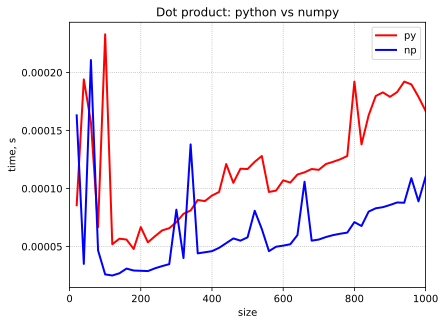

In [8]:
# PLOTTING AREA

def plot_time_vs_size(step=20, max_size=1000, n_samples=20):
    inner_py_times, inner_np_times = get_times_lists(python_inner, step, max_size, n_samples)
    sizes = np.arange(20, max_size + 1, 20)
    plt.plot(sizes, inner_py_times, c='r', lw=2, label="py")
    plt.plot(sizes, inner_np_times, c='b', lw=2, label="np")
    plt.xlim(0, max_size)
    plt.title("Dot product: python vs numpy")
    plt.legend()
    plt.xlabel("size")
    plt.ylabel("time, s")
    plt.grid(ls=":");


plot_time_vs_size()

On average, `np.dot` is 2-3 times better, than pythonic loops:

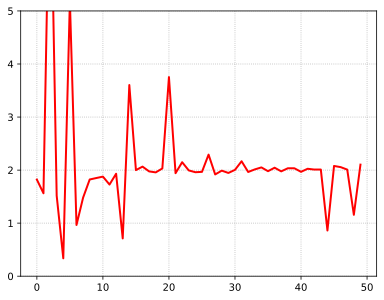

In [9]:
inner_py_times, inner_np_times = get_times_lists(python_inner)
plt.plot(inner_py_times / inner_np_times, lw=2, c='r');
plt.ylim(0, 5)
plt.grid(ls=":")